In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
algos = ['DQN', 'BCQ', 'CQL']
nr_trajs = [100, 1000, 10000, 50000, 100000]
opts = [0, 25, 50, 75, 100]
seeds = range(1, 4)

base_path = 'maintenance_offlineRL/d3rlpy_logs'
output_dir = 'plots'

palette = sns.color_palette("Set3", n_colors=len(algos))
algo_colors = dict(zip(algos, palette))

In [4]:
# Function to adjust color brightness
def adjust_color(color, factor):
    # Make a color darker (factor < 1) or lighter (factor > 1)
    r, g, b = color
    return (max(min(r * factor, 1), 0),
            max(min(g * factor, 1), 0),
            max(min(b * factor, 1), 0))

Plot successfully saved to: plots/negative_return_opt_0.png


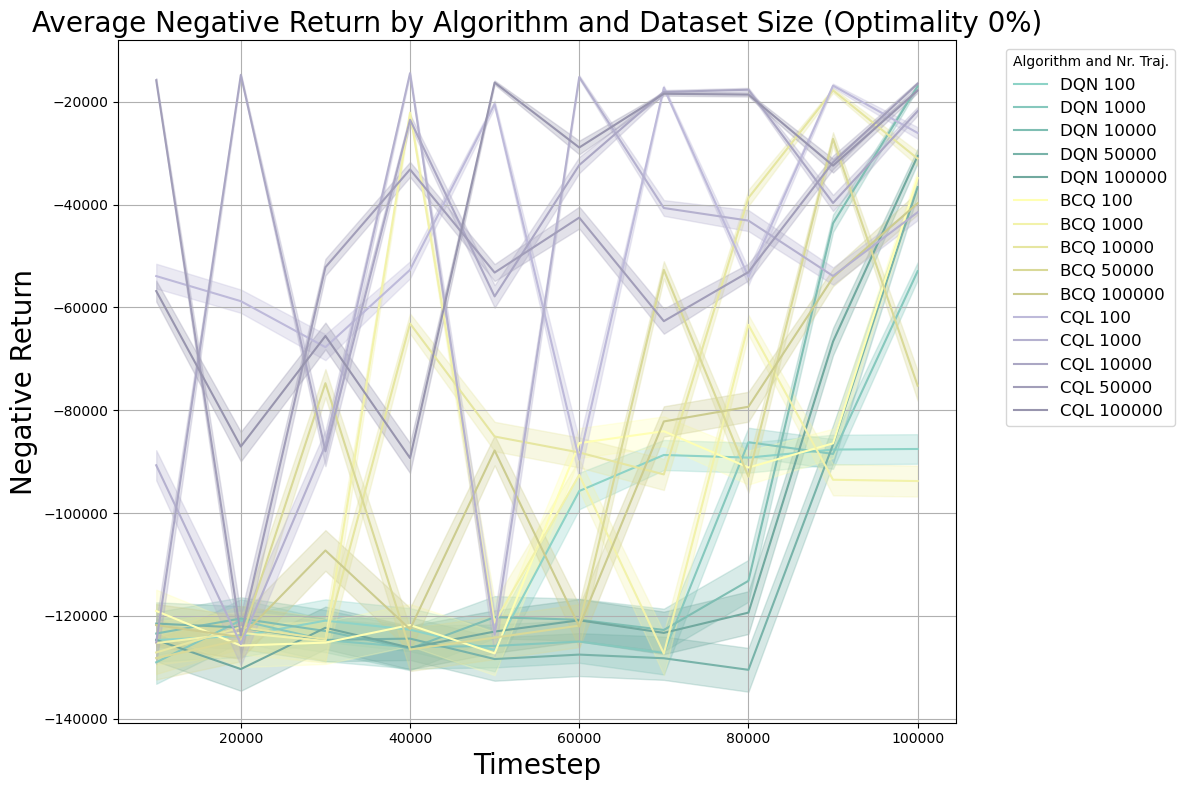

Plot successfully saved to: plots/negative_return_opt_25.png


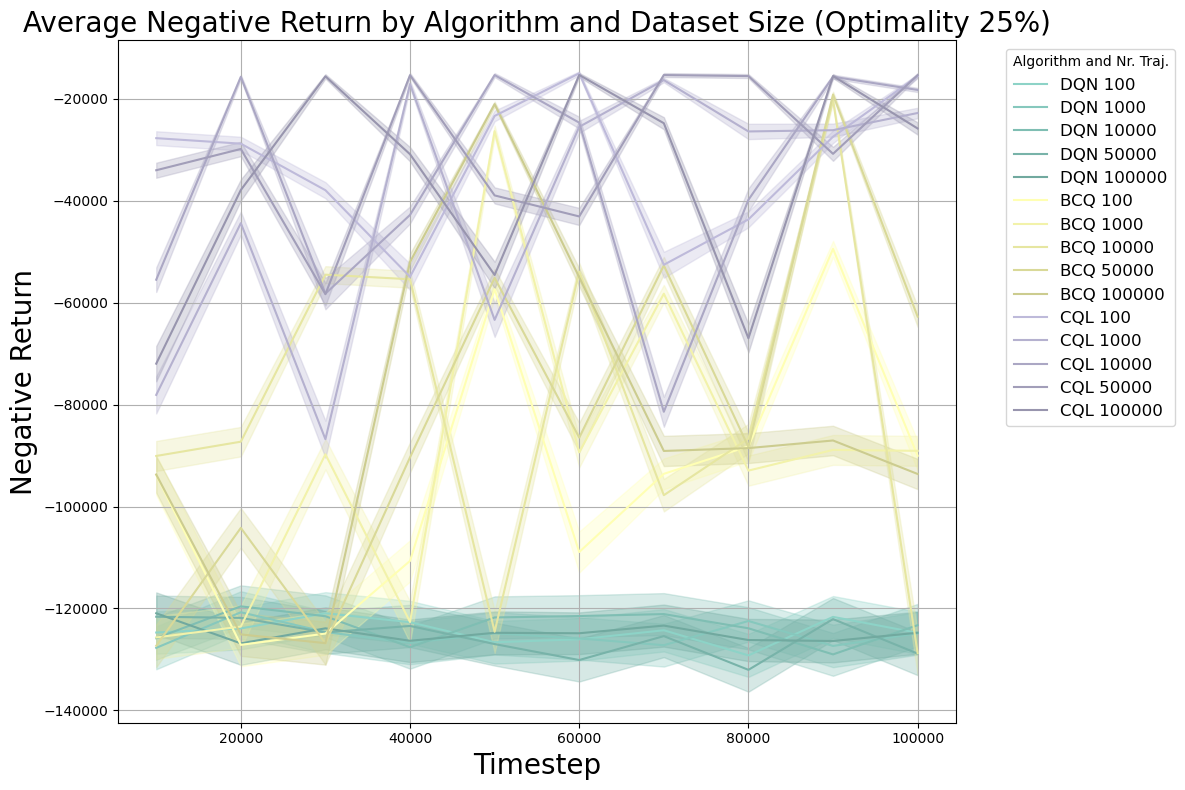

Plot successfully saved to: plots/negative_return_opt_50.png


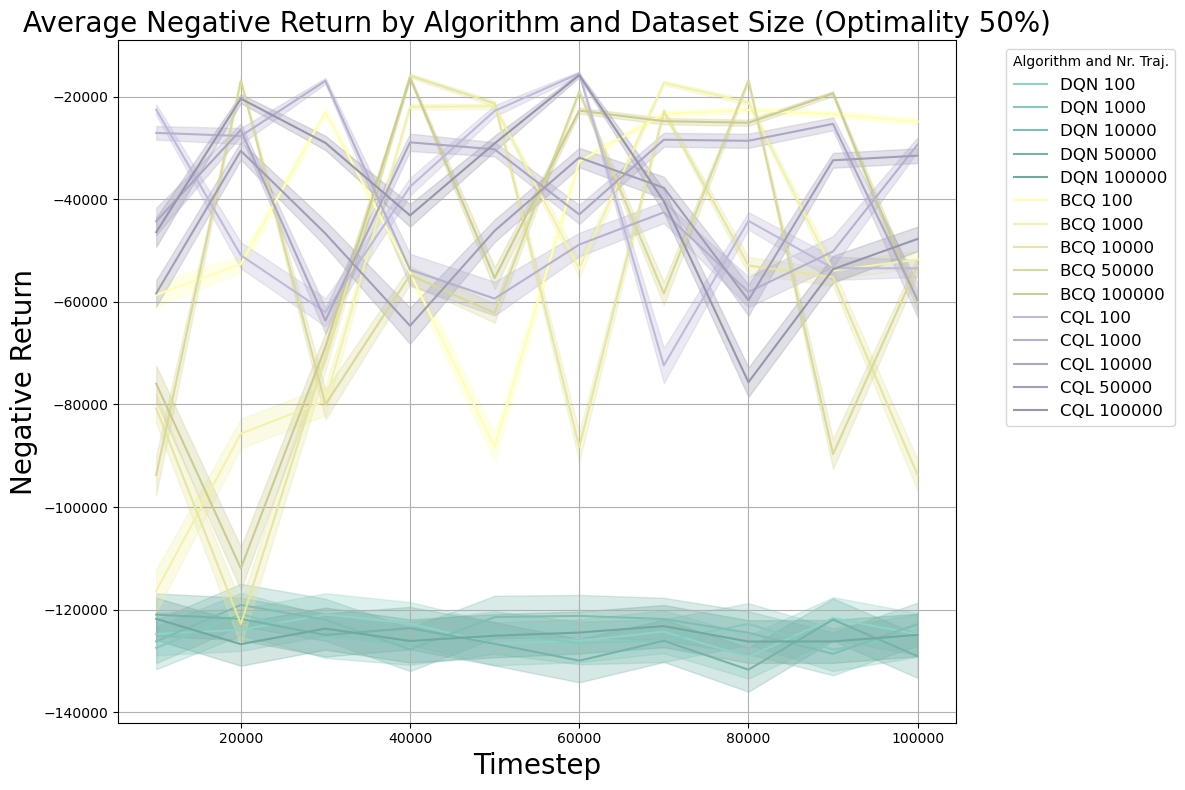

Plot successfully saved to: plots/negative_return_opt_75.png


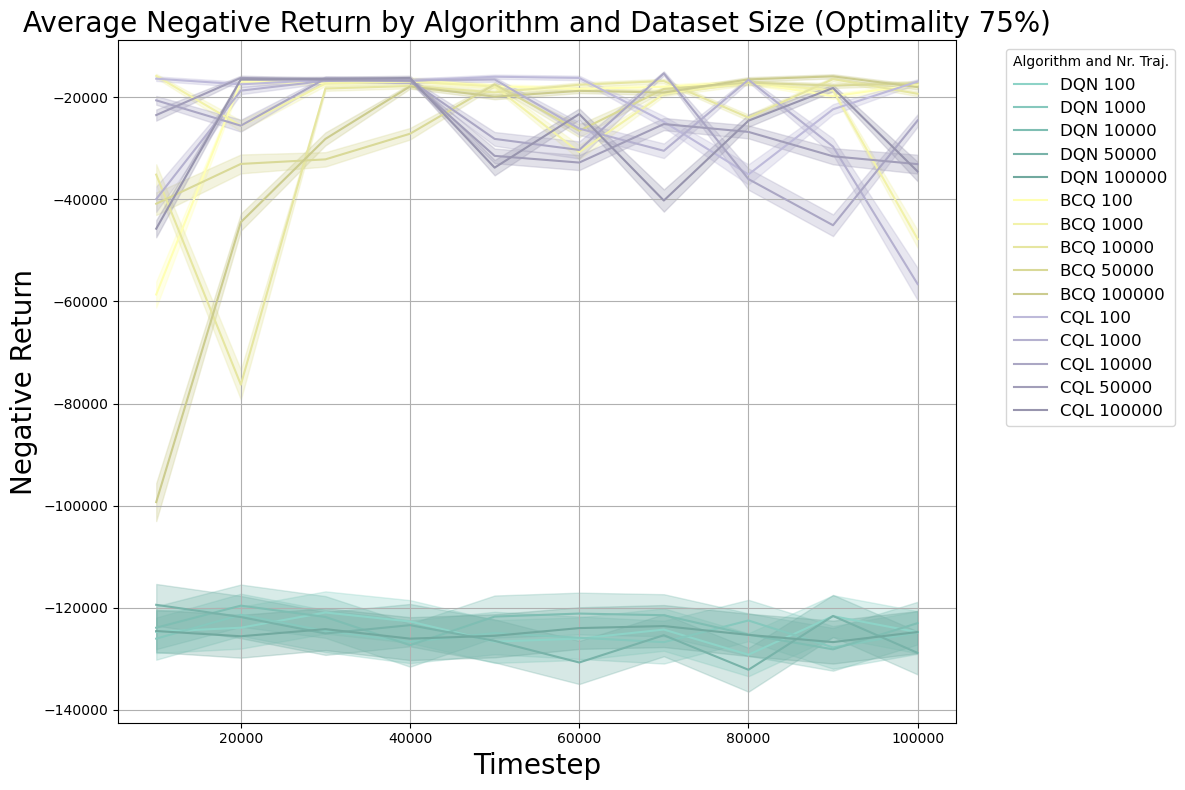

Plot successfully saved to: plots/negative_return_opt_100.png


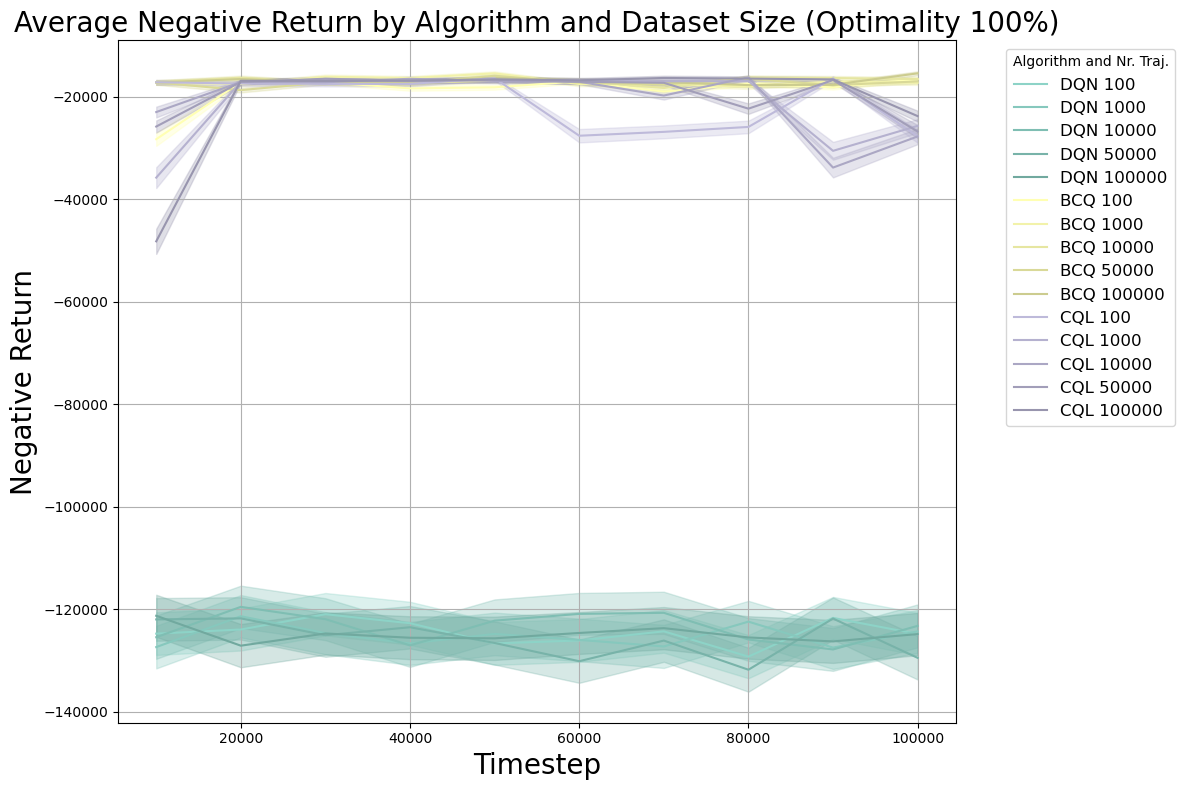

In [9]:
for opt in opts:
    plt.figure(figsize=(12, 8))
    for algo in algos:
        base_color = algo_colors[algo]
        for idx, nr_traj in enumerate(nr_trajs):
            factor = 1 - 0.05 * idx  # Darker for larger datasets
            color = adjust_color(base_color, factor)
            
            data_frames = []
            for seed in seeds:
                file_path = f'{base_path}/{algo}_nr_traj_{nr_traj}_opt_{opt}_seed_{seed}/evaluation_env.csv'
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path, header=None, sep=',',
                                     names=['Row', 'Timestep', 'Return', 'Variance', 'StandardError'])
                    data_frames.append(df)

            if data_frames:
                combined_df = pd.concat(data_frames)
                combined_df = combined_df.groupby('Timestep').agg({'Return': 'mean', 'StandardError': 'mean'}).reset_index()
                plt.plot(combined_df['Timestep'], combined_df['Return'], label=f'{algo} {nr_traj}', color=color)
                plt.fill_between(combined_df['Timestep'], 
                                 combined_df['Return'] - combined_df['StandardError'], 
                                 combined_df['Return'] + combined_df['StandardError'], 
                                 color=color, alpha=0.3)
            else:
                print(f"No data loaded for {algo} with nr_traj {nr_traj} and opt {opt}")

    filename = f'negative_return_opt_{opt}.png'
    filepath = os.path.join(output_dir, filename)

    
        
    plt.title(f'Average Negative Return by Algorithm and Dataset Size (Optimality {opt}%)', fontsize=20)
    plt.xlabel('Timestep',  fontsize=20)
    plt.ylabel('Negative Return',  fontsize=20)
    plt.legend(title='Algorithm and Nr. Traj.', loc='upper left', bbox_to_anchor=(1.05, 1),fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    
    try:
        plt.savefig(filepath)
        print(f"Plot successfully saved to: {filepath}")
    except Exception as e:
        print(f"Failed to save plot: {e}")
        
    plt.show()
    plt.close()
    

Plot successfully saved to: plots/negative_return_nr_traj_100.png


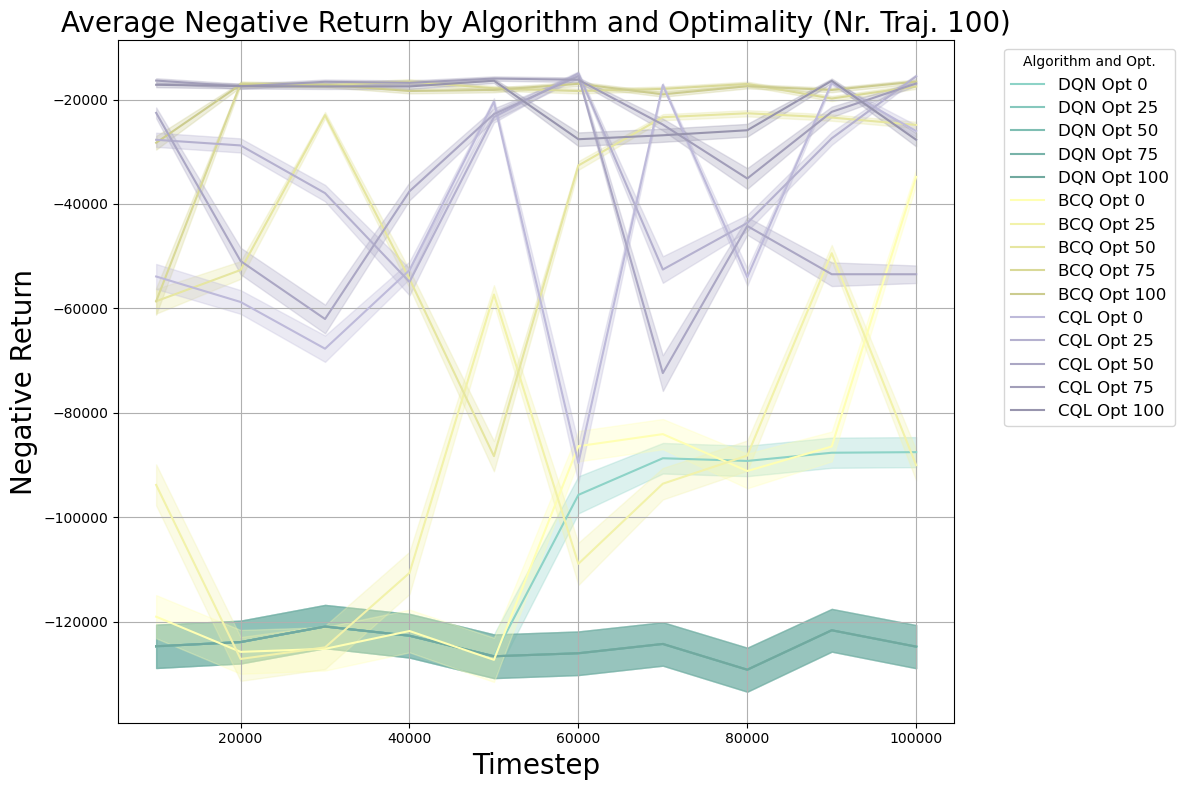

Plot successfully saved to: plots/negative_return_nr_traj_1000.png


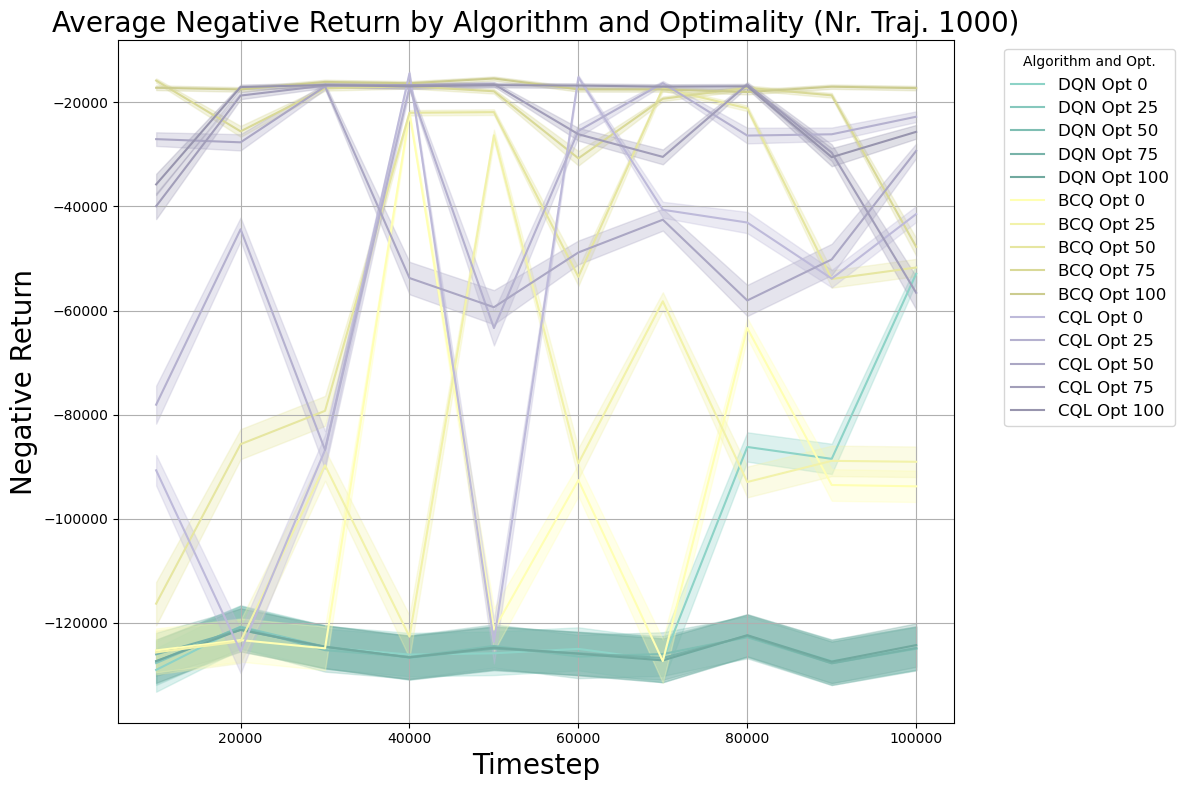

Plot successfully saved to: plots/negative_return_nr_traj_10000.png


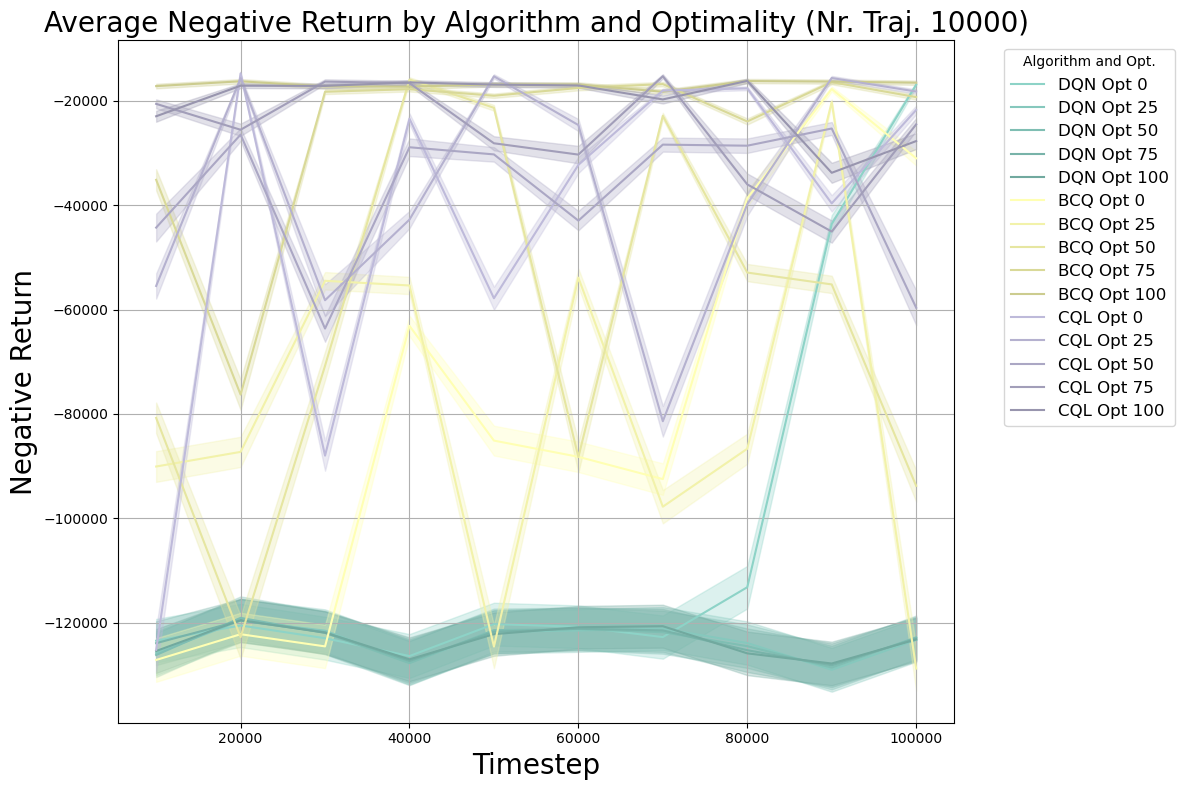

Plot successfully saved to: plots/negative_return_nr_traj_50000.png


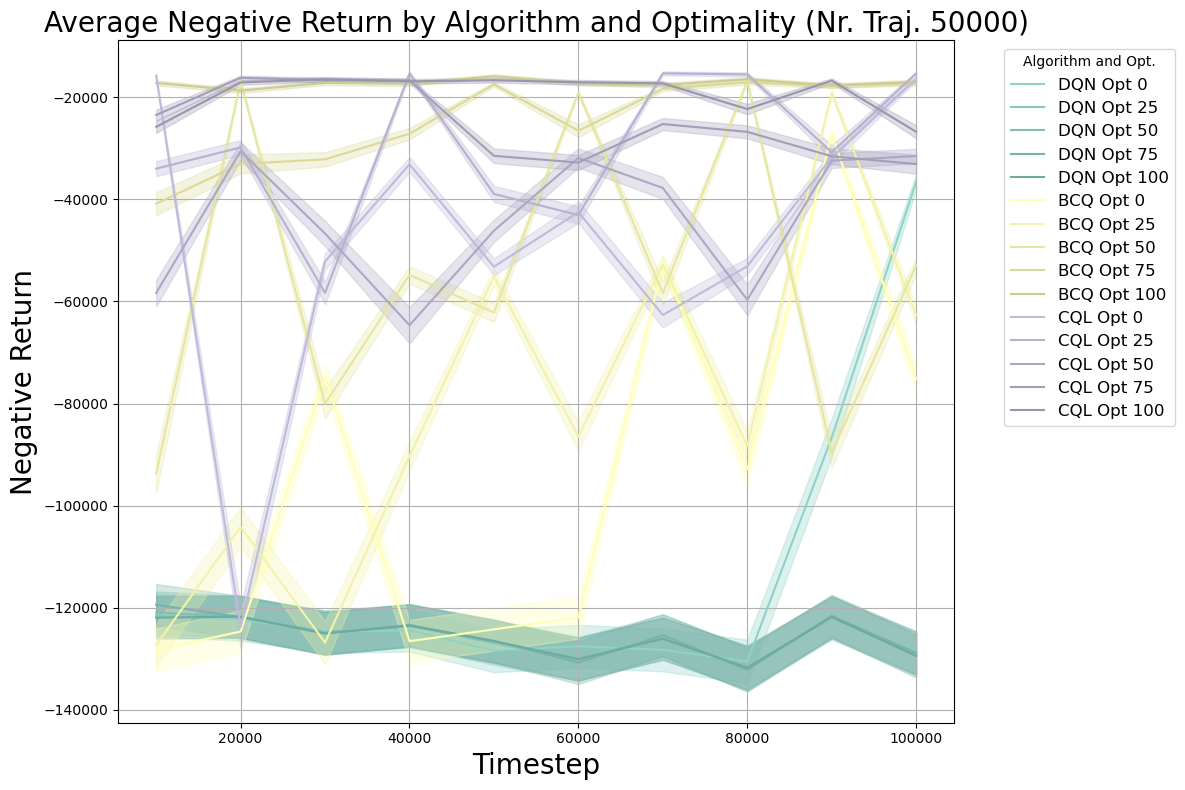

Plot successfully saved to: plots/negative_return_nr_traj_100000.png


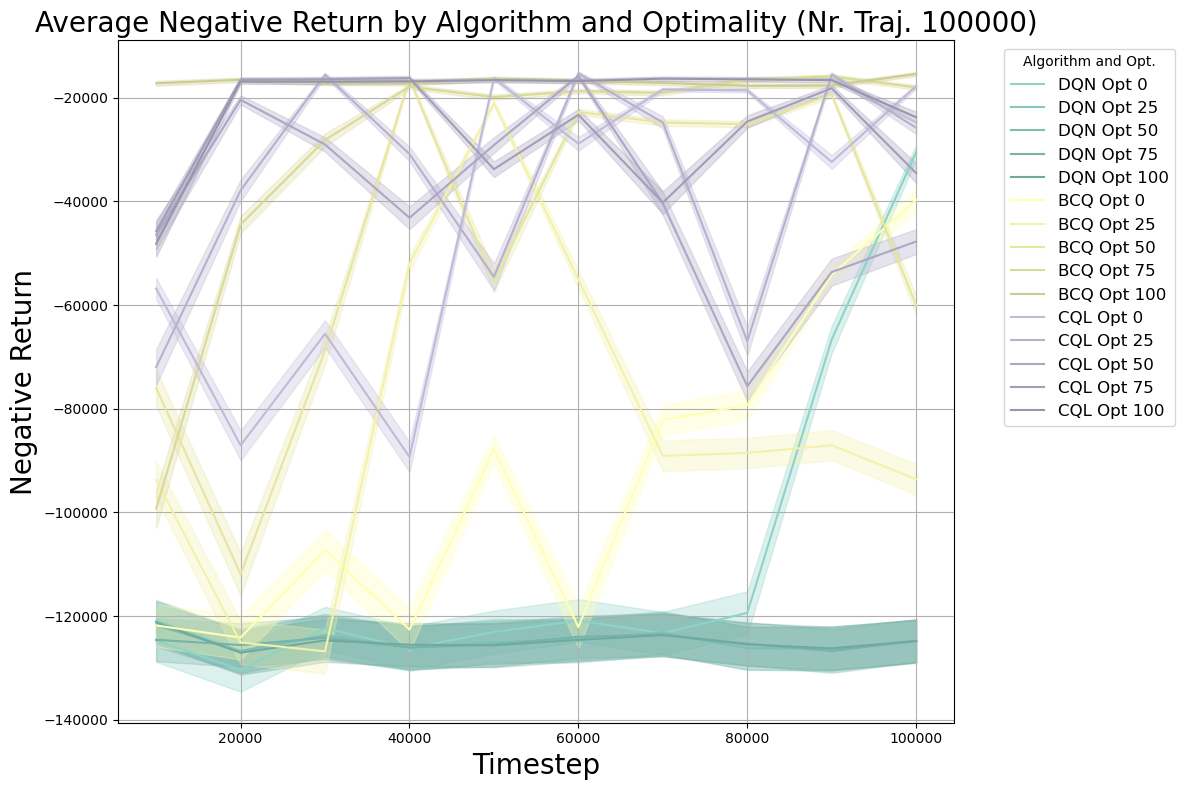

In [6]:
for nr_traj in nr_trajs:
    plt.figure(figsize=(12, 8))
    for algo in algos:
        base_color = algo_colors[algo]
        for idx, opt in enumerate(opts):
            factor = 1 - 0.05 * idx
            color = adjust_color(base_color, factor)
            
            data_frames = []
            for seed in seeds:
                file_path = f'{base_path}/{algo}_nr_traj_{nr_traj}_opt_{opt}_seed_{seed}/evaluation_env.csv'
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path, header=None, sep=',',
                                     names=['Row', 'Timestep', 'Return', 'Variance', 'StandardError'])
                    data_frames.append(df)

            if data_frames:
                combined_df = pd.concat(data_frames)
                combined_df = combined_df.groupby('Timestep').agg({'Return': 'mean', 'StandardError': 'mean'}).reset_index()
                plt.plot(combined_df['Timestep'], combined_df['Return'], label=f'{algo} Opt {opt}', color=color)
                plt.fill_between(combined_df['Timestep'], 
                                 combined_df['Return'] - combined_df['StandardError'], 
                                 combined_df['Return'] + combined_df['StandardError'], 
                                 color=color, alpha=0.3)
            else:
                print(f"No data loaded for {algo} with nr_traj {nr_traj} and opt {opt}")

    filename = f'negative_return_nr_traj_{nr_traj}.png'
    filepath = os.path.join(output_dir, filename)

    plt.title(f'Average Negative Return by Algorithm and Optimality (Nr. Traj. {nr_traj})', fontsize=20)
    plt.xlabel('Timestep', fontsize=20)
    plt.ylabel('Negative Return', fontsize=20)
    plt.legend(title='Algorithm and Opt.', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    
    try:
        plt.savefig(filepath)
        print(f"Plot successfully saved to: {filepath}")
    except Exception as e:
        print(f"Failed to save plot: {e}")
    plt.show()
    plt.close()



Plot successfully saved to: plots/negative_return_zoomed_opt_0.png


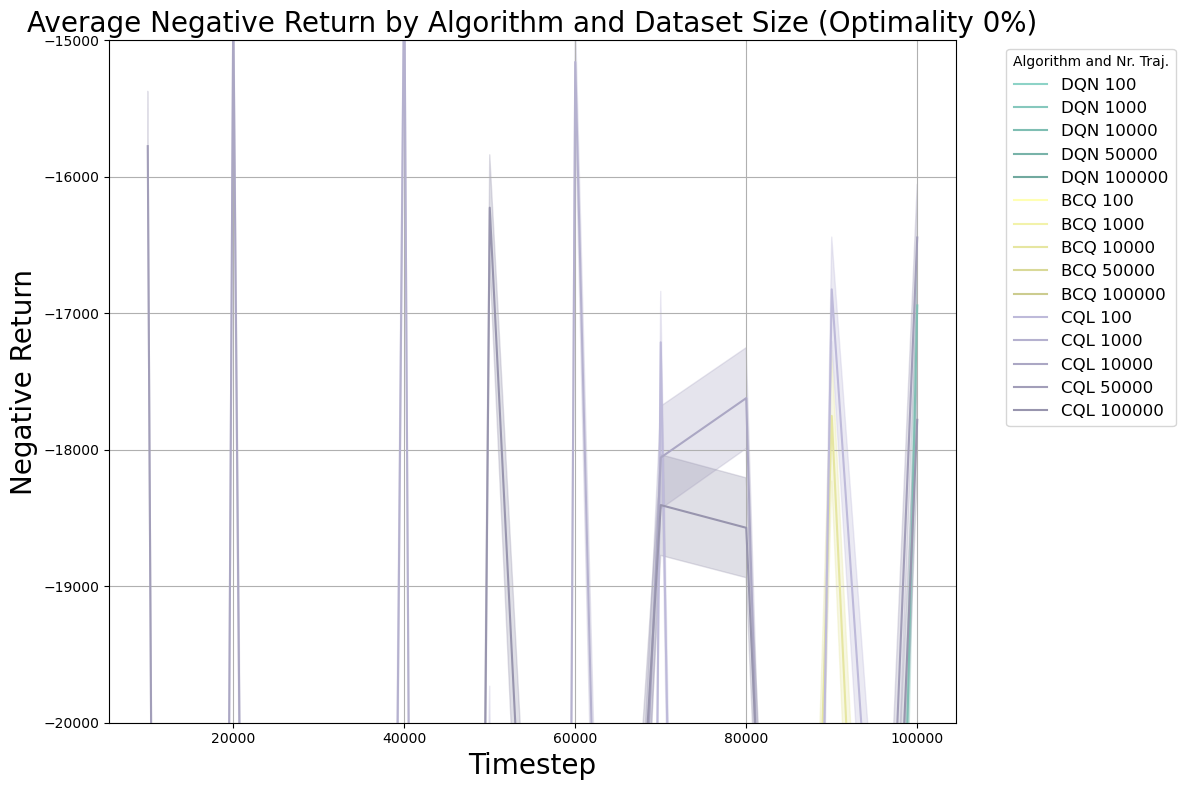

Plot successfully saved to: plots/negative_return_zoomed_opt_25.png


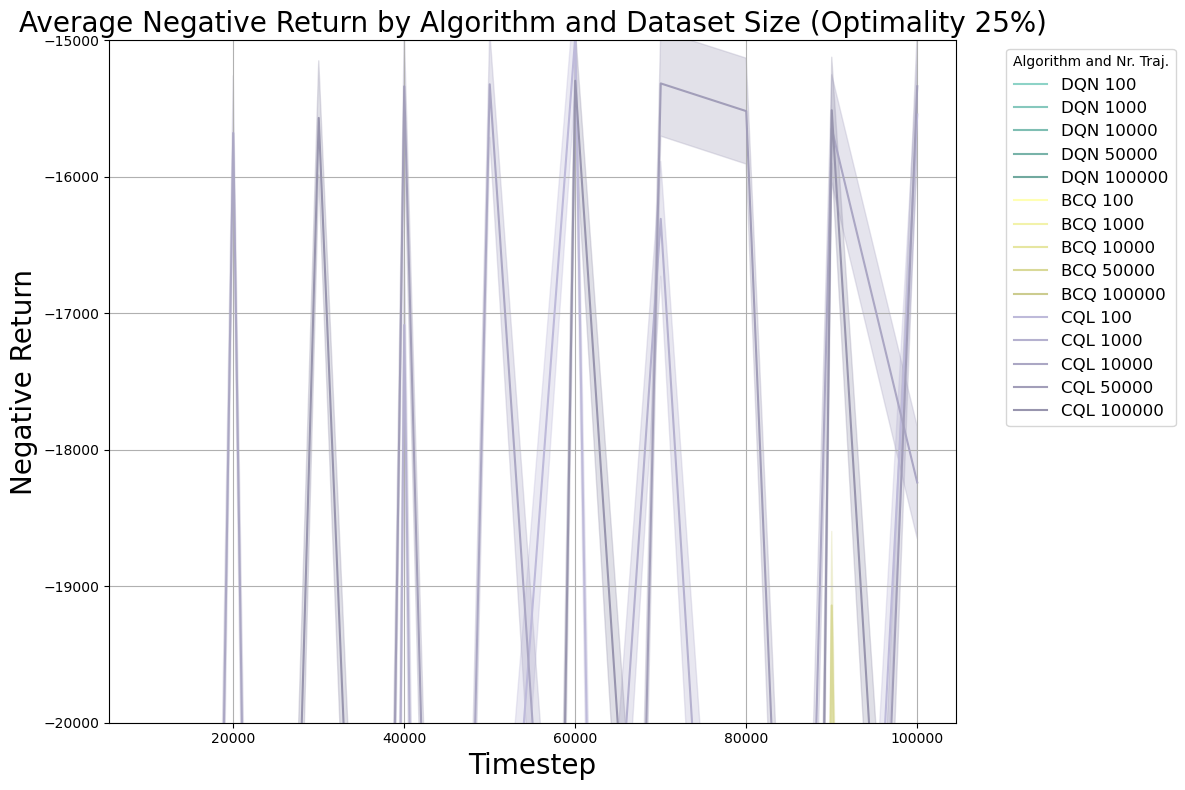

Plot successfully saved to: plots/negative_return_zoomed_opt_50.png


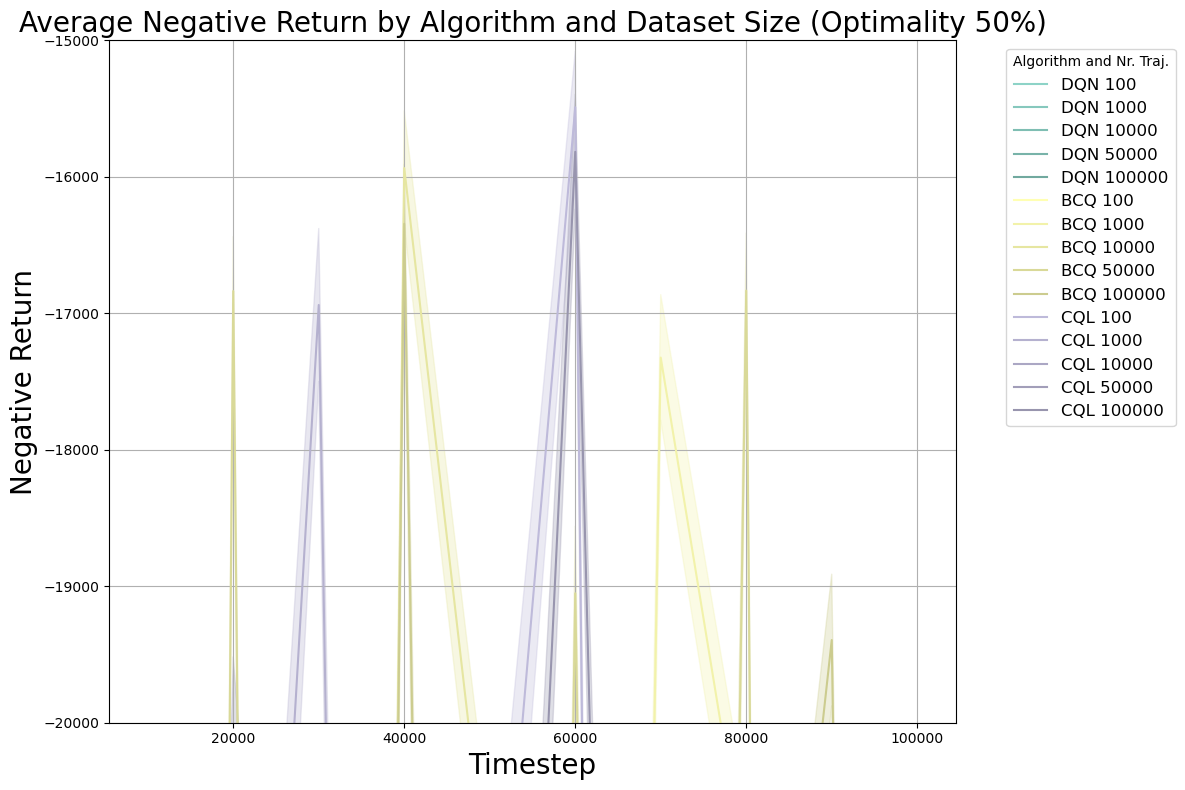

Plot successfully saved to: plots/negative_return_zoomed_opt_75.png


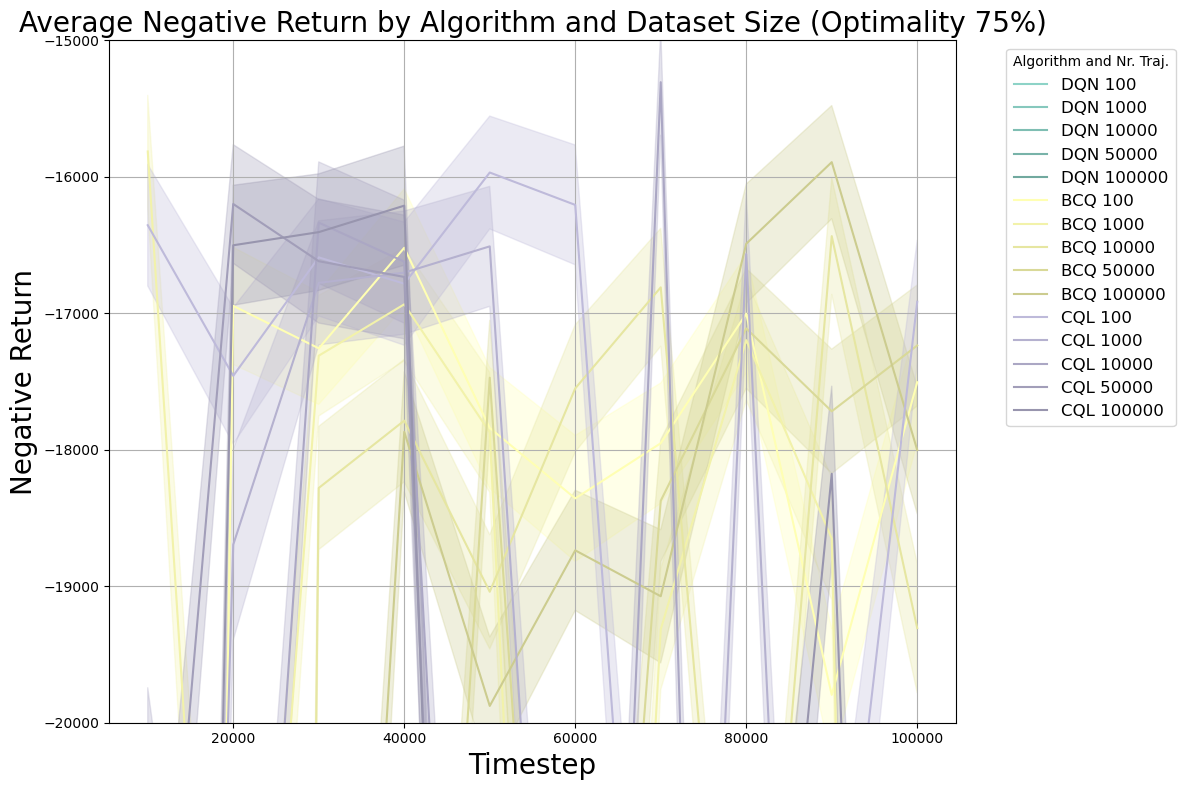

Plot successfully saved to: plots/negative_return_zoomed_opt_100.png


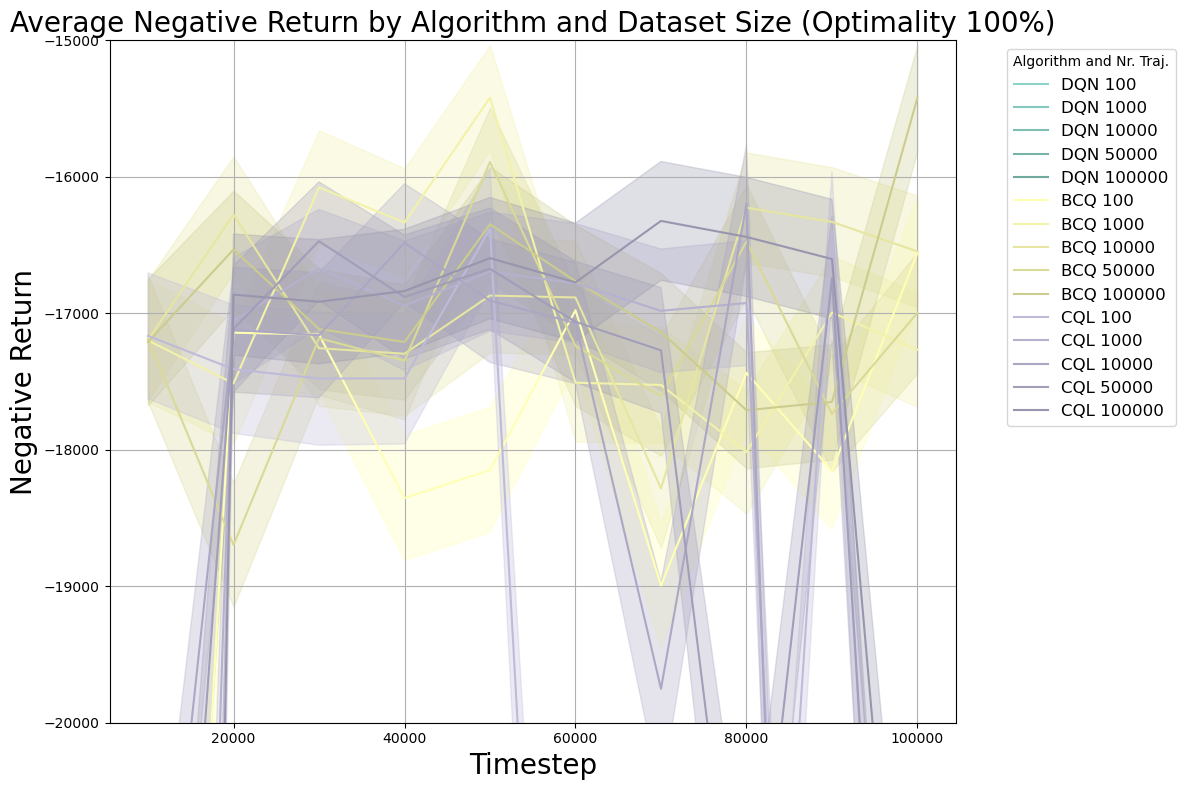

In [8]:
for opt in opts:
    plt.figure(figsize=(12, 8))
    for algo in algos:
        base_color = algo_colors[algo]
        for idx, nr_traj in enumerate(nr_trajs):
            factor = 1 - 0.05 * idx  # Darker for larger datasets
            color = adjust_color(base_color, factor)
            
            data_frames = []
            for seed in seeds:
                file_path = f'{base_path}/{algo}_nr_traj_{nr_traj}_opt_{opt}_seed_{seed}/evaluation_env.csv'
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path, header=None, sep=',',
                                     names=['Row', 'Timestep', 'Return', 'Variance', 'StandardError'])
                    data_frames.append(df)

            if data_frames:
                combined_df = pd.concat(data_frames)
                combined_df = combined_df.groupby('Timestep').agg({'Return': 'mean', 'StandardError': 'mean'}).reset_index()
                plt.plot(combined_df['Timestep'], combined_df['Return'], label=f'{algo} {nr_traj}', color=color)
                plt.fill_between(combined_df['Timestep'], 
                                 combined_df['Return'] - combined_df['StandardError'], 
                                 combined_df['Return'] + combined_df['StandardError'], 
                                 color=color, alpha=0.3)

            else:
                print(f"No data loaded for {algo} with nr_traj {nr_traj} and opt {opt}")

    plt.ylim(-20000, -15000) 

    filename = f'negative_return_zoomed_opt_{opt}.png'
    filepath = os.path.join(output_dir, filename)
    
    plt.title(f'Average Negative Return by Algorithm and Dataset Size (Optimality {opt}%)', fontsize=20)
    plt.xlabel('Timestep',  fontsize=20)
    plt.ylabel('Negative Return',  fontsize=20)
    plt.legend(title='Algorithm and Nr. Traj.', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    
    try:
        plt.savefig(filepath)
        print(f"Plot successfully saved to: {filepath}")
    except Exception as e:
        print(f"Failed to save plot: {e}")
        
    plt.show()
    plt.close()
